<a href="https://colab.research.google.com/github/wongjl/ACV_Quickdraw_TPU/blob/master/ACV_Quickdraw_challenge_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickdraw

In [1]:
!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

!ls

quickdraw  sample_data


In [2]:
!ls quickdraw

'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


## Imports

In [0]:
import os
import warnings



import tensorflow.keras.layers as layers
from tensorflow.keras import optimizers


from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Model,load_model,Sequential

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten
from tensorflow.keras import backend as K

from tensorflow.keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau

import tensorflow as tf

In [4]:
try:
    device_name = os.environ['COLAB_TPU_ADDR']
    TPU_ADDRESS = 'grpc://' + device_name
    print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
    print('TPU not found')

Found TPU at: grpc://10.12.59.146:8470


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from glob import glob
import ntpath

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow as tf

In [6]:
arr = np.load('./quickdraw/bee.npy')
arr.shape

(120890, 784)

In [0]:
file_names = glob('./quickdraw/*.npy')

In [8]:
# make some class names
class_names = []

for file in file_names:
  name = ntpath.basename(file)
  class_names.append(name[:-4])
  
  
print(class_names)
print(len(class_names))

['fish', 'face', 'eyeglasses', 'postcard', 'cookie', 'alarm clock', 'brain', 'angel', 'donut', 'ant', 'cat', 'cactus', 'bee', 'rainbow', 'ambulance', 'lollipop', 'birthday cake', 'palm tree', 'pig', 'banana']
20


In [0]:
# get 200 of each class for plotting

x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(200)]
  arr = np.load(filename)
  arr = arr[:200]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [10]:
y_labels.shape

(4000,)

In [11]:
y_labels[190:210]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## For MNIST

In [12]:
(mnist_x,mnist_y), (_,_) = tf.keras.datasets.mnist.load_data()
mnist_x =mnist_x.reshape(60000,784)

11493376/11490434 [==============================] - 0s 0us/step


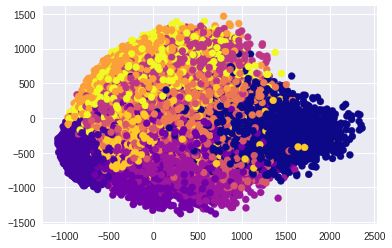

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_x)
groups = mnist_y.tolist()
colors = [int(i % 20) for i in groups]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## PCA for QuickDraw

(2000, 2)


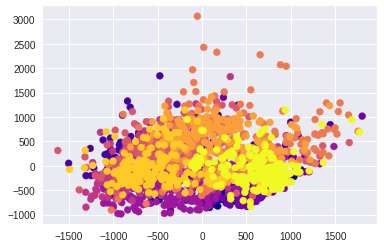

In [14]:
# from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(x_data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_data[:2000])

print(principalComponents.shape)

groups = y_labels.tolist()
colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## Plot TSNE  for QuickDraw

In [15]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_data[:2000])

print('t-SNE Finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.071s...
[t-SNE] Computed neighbors for 2000 samples in 7.731s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 637.679975
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.968903
[t-SNE] KL divergence after 300 iterations: 1.856981
t-SNE Finished! Time elapsed: 15.952856063842773 seconds


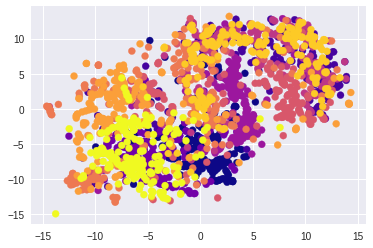

In [16]:
import matplotlib.cm as cm

groups = y_labels.tolist()

colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

In [0]:
i= int(i % 20)

In [0]:
x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(10000)]
  arr = np.load(filename)
  arr = arr[:10000]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

## Prepare data for network

In [19]:
file_names

['./quickdraw/fish.npy',
 './quickdraw/face.npy',
 './quickdraw/eyeglasses.npy',
 './quickdraw/postcard.npy',
 './quickdraw/cookie.npy',
 './quickdraw/alarm clock.npy',
 './quickdraw/brain.npy',
 './quickdraw/angel.npy',
 './quickdraw/donut.npy',
 './quickdraw/ant.npy',
 './quickdraw/cat.npy',
 './quickdraw/cactus.npy',
 './quickdraw/bee.npy',
 './quickdraw/rainbow.npy',
 './quickdraw/ambulance.npy',
 './quickdraw/lollipop.npy',
 './quickdraw/birthday cake.npy',
 './quickdraw/palm tree.npy',
 './quickdraw/pig.npy',
 './quickdraw/banana.npy']

In [0]:
data = np.array([])
all_labels = np.array([])
size_per_class = 20000
train_percent = 0.8

for i, filename in enumerate(file_names):
  labels = [i for j in range(size_per_class)]
  arr = np.load(filename)
  arr = arr[:size_per_class]
  if len(data) == 0:
    data = arr
    all_labels = labels
  else:
    data = np.concatenate((data, arr))
    all_labels = np.concatenate((all_labels, labels))

In [21]:
data.shape, all_labels.shape

((400000, 784), (400000,))

In [0]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, all_labels, test_size=1-train_percent, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=1-train_percent, random_state=42)

In [23]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(256000, 784)
(64000, 784)
(80000, 784)
(256000,)
(64000,)
(80000,)


In [24]:
int(arr.shape[0]*0.8)

16000

In [25]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  62, 158, 186, 169, 116,  42,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  26, 251, 229, 192, 215, 253,
       251, 127,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  62, 255,  93,   0,
         0,  17, 154, 255, 183,   8,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   8, 103, 204, 25

In [26]:
x_train[0].shape

(784,)

In [27]:
x_train.shape

(256000, 784)

In [0]:
image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_valid = x_valid.reshape(x_valid.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_valid /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = tf.keras.utils.to_categorical(y_train, len(class_names))
y_valid = tf.keras.utils.to_categorical(y_valid, len(class_names))
y_test = tf.keras.utils.to_categorical(y_test, len(class_names))

## Data Pipeline

### Helper Functions

In [0]:
def _parse_function(image, label):
  image_resized = tf.image.grayscale_to_rgb(image)
  return image_resized, label

In [0]:
def train_input_fn(batch_size=1024):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
    dataset = dataset.map(_parse_function)

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.cache()
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size, drop_remainder=True)


    # Return the dataset.
    return dataset

In [0]:
def valid_input_fn(batch_size=1024):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((x_valid,y_valid))
    dataset = dataset.map(_parse_function)

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.cache()
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size, drop_remainder=True)


    # Return the dataset.
    return dataset

In [0]:
def test_input_fn(batch_size=1024):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
    dataset = dataset.map(_parse_function)

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.cache()
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size, drop_remainder=True)


    # Return the dataset.
    return dataset

## Model

In [33]:
num_classes = len(class_names)
x_train.shape[0]

256000

In [34]:
img_rows, img_cols = 28, 28
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import tensorflow as tf 

input_shape = (img_rows, img_cols, 3)
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)

x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)

x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_03')(x)
x = BatchNormalization()(x)
x = Flatten(name = 'Flatten_01')(x)

x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = BatchNormalization()(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model = Model(Inp,output)
#optimizer
learning_rate = 0.01

opt = tf.keras.optimizers.Adam(lr = learning_rate)

# Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer= opt,
              metrics=['accuracy'])

In [36]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.12.59.146:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 12184957029819349927)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11179881463419245057)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15510310464665605142)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU

In [37]:
tpu_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 3)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 13, 13, 32)        0         
_________________________________________________________________
Conv_02 (Conv2D)             (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 11, 11, 64)        256       
_________________________________________________________________
MaxPool_02 (MaxPooling2D)    (None, 5, 5, 64)          0         
__________

## Train

In [38]:
# # # Train the model with validation 
epochs = 20
batch_size = 1024
train_steps = int(x_train.shape[0]/batch_size) #total trains set / batch_size
val_steps = int(x_valid.shape[0]/batch_size)
history = tpu_model.fit(
    train_input_fn,
    steps_per_epoch = train_steps,
    epochs=epochs,
    validation_data = valid_input_fn,
    validation_steps = val_steps)

Epoch 1/20
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(1024,), dtype=tf.int32, name=None), TensorSpec(shape=(1024, 28, 28, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1024, 20), dtype=tf.float32, name=None)]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.009999999776482582, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for input_1
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7f5913919128> []
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 4.656557083129883 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.009999999776482582 {0.01}
INFO:tensorflow:CPU -> TPU beta_1: 0.8999999761581421 {

## Evaluate 

In [41]:
test_steps = int(x_test.shape[0]/batch_size)
metrics_test = tpu_model.evaluate(test_input_fn, steps = test_steps)
print("model accuracy:",metrics_test[1])

78/78 [==============================] - 5s 61ms/step - loss: 0.5279 - acc: 0.9048
model accuracy: 0.9048071
